* The purpose of this notebook is to satisfy curiosity and have fun.
* I used to wonder if I should buy US stocks or Canadian stocks. This analysis may shed some light.
* You can set other stocks and compare them, as well as the periods and intervals of historical data. (You can refer to yfinance: https://github.com/ranaroussi/yfinance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
# Set Tickers and parameters
tickers = {
    'TSX':'^GSPTSE',  # The ticker you set here will be the benchmark. Maybe you should always set SP500 here or maybe not.
    'SP500':'^GSPC',
    'DJones':'^DJI',
    'NASDAQ':'^IXIC'
}

prd = '20y'
itvl = '1wk'

# **1. Summary**

In [3]:
ticker_number = len(tickers.values())

In [4]:
keys_list =list(tickers.keys())
data_info = []
hist_data = []
for ticker in tickers.values():
    ticker = yf.Ticker(ticker)
    data_info.append(ticker.info)
    hist_data.append(ticker.history(period=prd,interval=itvl))


In [5]:
# The summary of each tickers
df_all = pd.DataFrame(data_info,index=tickers.values())
df_all.head(5)

,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,...,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,trailingPegRatio
^GSPTSE,86400,2,20292.620,20398.79,20398.790,20575.360,20292.620,20398.79,20398.790,20575.360,...,^GSPTSE,S&P/TSX Composite index,S&P/TSX Composite index,299511000,America/Toronto,EDT,68ad81ac-8b2a-355b-ad98-7242ced6d258,finmb_INDEXGSPTSE,-14400000,None
^GSPC,86400,2,4507.660,4530.60,4501.350,4541.250,4507.660,4530.60,4501.350,4541.250,...,^GSPC,S&P 500,S&P 500,-1325583000,America/New_York,EDT,8ffd55d1-3d1d-3733-a480-56768bc708e6,finmb_INDEXGSPC,-14400000,None
^DJI,86400,2,34721.910,34876.24,34720.700,34979.180,34721.910,34876.24,34720.700,34979.180,...,^DJI,Dow Jones Industrial Average,Dow Jones Industrial Average,694362600,America/New_York,EDT,fc24b2b0-ced7-33cc-9057-0b6d90973fc4,finmb_INDEXDJI,-14400000,None
^IXIC,86400,2,14034.969,14130.00,13982.421,14149.622,14034.969,14130.00,13982.421,14149.622,...,^IXIC,NASDAQ Composite,NASDAQ Composite,34612200,America/New_York,EDT,6b51a47d-53e9-30d4-8a47-289ac3188b0f,finmb_INDEXIXIC,-14400000,None


In [6]:
df_all.columns

Index(['maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh',
       'regularMarketPreviousClose', 'regularMarketOpen',
       'regularMarketDayLow', 'regularMarketDayHigh', 'volume',
       'regularMarketVolume', 'averageVolume', 'averageVolume10days',
       'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize',
       'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'fiftyDayAverage',
       'twoHundredDayAverage', 'currency', 'exchange', 'quoteType', 'symbol',
       'underlyingSymbol', 'shortName', 'longName', 'firstTradeDateEpochUtc',
       'timeZoneFullName', 'timeZoneShortName', 'uuid', 'messageBoardId',
       'gmtOffSetMilliseconds', 'trailingPegRatio'],
      dtype='object')

In [7]:
# Get rid of not-helping columns
df_all.drop(columns=['askSize','maxAge','priceHint','firstTradeDateEpochUtc','timeZoneFullName','timeZoneShortName','uuid','messageBoardId','gmtOffSetMilliseconds','trailingPegRatio','underlyingSymbol','longName','bidSize'],inplace=True)
df_all

,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,volume,regularMarketVolume,...,ask,fiftyTwoWeekLow,fiftyTwoWeekHigh,fiftyDayAverage,twoHundredDayAverage,currency,exchange,quoteType,symbol,shortName
^GSPTSE,20292.620,20398.79,20398.790,20575.360,20292.620,20398.79,20398.790,20575.360,208562581,208562581,...,20578.49,18169.90,22213.10,19412.8340,20565.850,CAD,TSI,INDEX,^GSPTSE,S&P/TSX Composite index
^GSPC,4507.660,4530.60,4501.350,4541.250,4507.660,4530.60,4501.350,4541.250,1958155000,1958155000,...,4532.24,3491.58,4607.07,4469.5156,4160.040,USD,SNP,INDEX,^GSPC,S&P 500
^DJI,34721.910,34876.24,34720.700,34979.180,34721.910,34876.24,34720.700,34979.180,289072714,289072714,...,34884.51,28660.94,35679.13,34727.7700,33771.297,USD,DJI,INDEX,^DJI,Dow Jones Industrial Average
^IXIC,14034.969,14130.00,13982.421,14149.622,14034.969,14130.00,13982.421,14149.622,3630895000,3630895000,...,0.00,10088.83,14446.55,13842.8500,12296.298,USD,NIM,INDEX,^IXIC,NASDAQ Composite


In [8]:
# Make sure every dataset has the same length
dlen = []
for i in range(ticker_number):
    dlen.append(len(hist_data[i]['Close']))

min_len = min(dlen)

In [9]:
hist_d =[ ]
for i in range(ticker_number):
    tlen = len(hist_data[i]['Close'])
    hist_d.append(hist_data[i]['Close'][tlen-min_len:])


In [10]:
# Put historical data into one DataFrame
colName= list(tickers.keys())
idx = hist_d[0].index

df_his = pd.DataFrame(np.array(hist_d).T,columns=colName,index=idx)
df_his.head(5)

,TSX,SP500,DJones,NASDAQ
Date,,,,
2003-09-01 00:00:00-04:00,7612.500000,1021.390015,9503.339844,1858.239990
2003-09-08 00:00:00-04:00,7580.100098,1018.630005,9471.549805,1855.030029
2003-09-15 00:00:00-04:00,7602.200195,1036.300049,9644.820312,1905.699951
2003-09-22 00:00:00-04:00,7433.100098,996.849976,9313.080078,1792.069946
2003-09-29 00:00:00-04:00,7519.600098,1029.849976,9572.309570,1880.569946


# **2.Data Preparing**

In [11]:
# Modify the Date type to yyyy-mm-dd
df_his.index = pd.to_datetime(df_his.index.date)
df_his.head(5)

,TSX,SP500,DJones,NASDAQ
2003-09-01,7612.500000,1021.390015,9503.339844,1858.239990
2003-09-08,7580.100098,1018.630005,9471.549805,1855.030029
2003-09-15,7602.200195,1036.300049,9644.820312,1905.699951
2003-09-22,7433.100098,996.849976,9313.080078,1792.069946
2003-09-29,7519.600098,1029.849976,9572.309570,1880.569946


In [12]:
# Save to file for later usage.
df_his.to_csv('./hist.csv')

In [13]:
# Computer the log returns
for item in df_his.columns:
    df_his[item+'_Ret'] = np.log(df_his[item]/df_his[item].shift(1))
    
df_his.head(5)

,TSX,SP500,DJones,NASDAQ,TSX_Ret,SP500_Ret,DJones_Ret,NASDAQ_Ret
2003-09-01,7612.500000,1021.390015,9503.339844,1858.239990,NaN,NaN,NaN,NaN
2003-09-08,7580.100098,1018.630005,9471.549805,1855.030029,-0.004265,-0.002706,-0.003351,-0.001729
2003-09-15,7602.200195,1036.300049,9644.820312,1905.699951,0.002911,0.017198,0.018128,0.026948
2003-09-22,7433.100098,996.849976,9313.080078,1792.069946,-0.022495,-0.038812,-0.035001,-0.061478
2003-09-29,7519.600098,1029.849976,9572.309570,1880.569946,0.011570,0.032568,0.027455,0.048204


In [14]:
ret_cols = [col for col in df_his.columns if 'Ret' in col]

In [15]:
# Drop the row where the return value is nan
rIdx = df_his[df_his[ret_cols[0]].isna()].index
df_his.drop(index=rIdx,inplace=True)
df_his.head(5)

,TSX,SP500,DJones,NASDAQ,TSX_Ret,SP500_Ret,DJones_Ret,NASDAQ_Ret
2003-09-08,7580.100098,1018.630005,9471.549805,1855.030029,-0.004265,-0.002706,-0.003351,-0.001729
2003-09-15,7602.200195,1036.300049,9644.820312,1905.699951,0.002911,0.017198,0.018128,0.026948
2003-09-22,7433.100098,996.849976,9313.080078,1792.069946,-0.022495,-0.038812,-0.035001,-0.061478
2003-09-29,7519.600098,1029.849976,9572.309570,1880.569946,0.011570,0.032568,0.027455,0.048204
2003-10-06,7633.600098,1038.060059,9674.679688,1915.310059,0.015047,0.007941,0.010638,0.018305


In [16]:
#Check if nan
df_his.isna().any()

TSX           False
SP500         False
DJones        False
NASDAQ        False
TSX_Ret       False
SP500_Ret     False
DJones_Ret    False
NASDAQ_Ret    False
dtype: bool

* Finally, everything seems perfect now.

In [17]:
# We put the returns in a separate dataframe.
df_ret = df_his[ret_cols].copy()
df_ret.head()

,TSX_Ret,SP500_Ret,DJones_Ret,NASDAQ_Ret
2003-09-08,-0.004265,-0.002706,-0.003351,-0.001729
2003-09-15,0.002911,0.017198,0.018128,0.026948
2003-09-22,-0.022495,-0.038812,-0.035001,-0.061478
2003-09-29,0.011570,0.032568,0.027455,0.048204
2003-10-06,0.015047,0.007941,0.010638,0.018305


In [18]:
# We also need cumulative log returns

for item in df_ret.columns:
    df_ret[item+'_Cum'] = np.cumsum(df_ret[item])
    
df_ret.head(5)

,TSX_Ret,SP500_Ret,DJones_Ret,NASDAQ_Ret,TSX_Ret_Cum,SP500_Ret_Cum,DJones_Ret_Cum,NASDAQ_Ret_Cum
2003-09-08,-0.004265,-0.002706,-0.003351,-0.001729,-0.004265,-0.002706,-0.003351,-0.001729
2003-09-15,0.002911,0.017198,0.018128,0.026948,-0.001354,0.014492,0.014778,0.025220
2003-09-22,-0.022495,-0.038812,-0.035001,-0.061478,-0.023849,-0.024319,-0.020223,-0.036258
2003-09-29,0.011570,0.032568,0.027455,0.048204,-0.012279,0.008249,0.007231,0.011945
2003-10-06,0.015047,0.007941,0.010638,0.018305,0.002768,0.016189,0.017869,0.030250


In [19]:
ret_col = [col for col in df_ret.columns if 'Cum' not in col]
cum_col = [col for col in df_ret.columns if 'Cum' in col]

# **3.EDA**

## 3.1 Data Summary

In [20]:
df_ret[ret_col].describe().T

,count,mean,std,min,25%,50%,75%,max
TSX_Ret,1043.0,0.000952,0.022724,-0.175418,-0.007877,0.003158,0.012906,0.128168
SP500_Ret,1043.0,0.001425,0.024371,-0.200838,-0.009298,0.002665,0.014285,0.114237
DJones_Ret,1043.0,0.001246,0.023856,-0.200298,-0.009178,0.002480,0.013696,0.120840
NASDAQ_Ret,1043.0,0.001938,0.027418,-0.166012,-0.011513,0.003677,0.018306,0.103671


Interesting...
* NASDAQ has the largest mean returns and std, however has the smallest maximun and minimun returns.

## 3.2 Univariate

In [21]:
def univ_plot(dataset,x,kde=True):
    fig,axs = plt.subplots(
        nrows=2,
        figsize=(8,4),
        gridspec_kw={'height_ratios': [1, 3]})
    
    sns.histplot(dataset,x=x, kde=True,ax=axs[1])
    axs[1].axvline(x=x.mean(),color='darkred',linestyle='--')
    axs[1].axvline(x=x.median(),color='darkgreen',linestyle='--')
    sns.boxplot(x= x,ax=axs[0],showmeans=True,color='purple')

    plt.show()

In [22]:
ret_col

['TSX_Ret', 'SP500_Ret', 'DJones_Ret', 'NASDAQ_Ret']

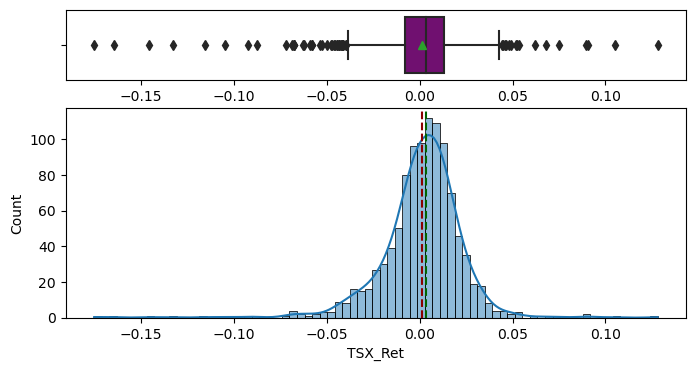

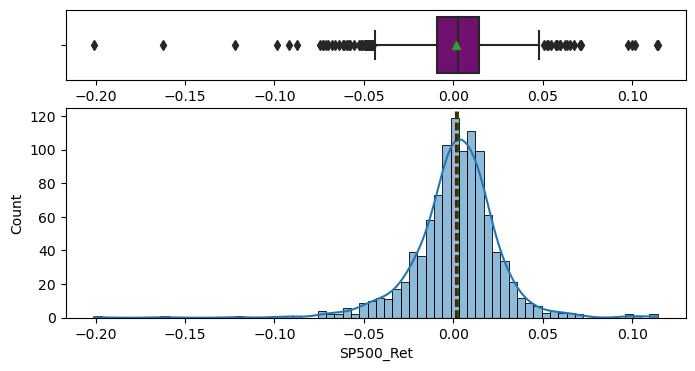

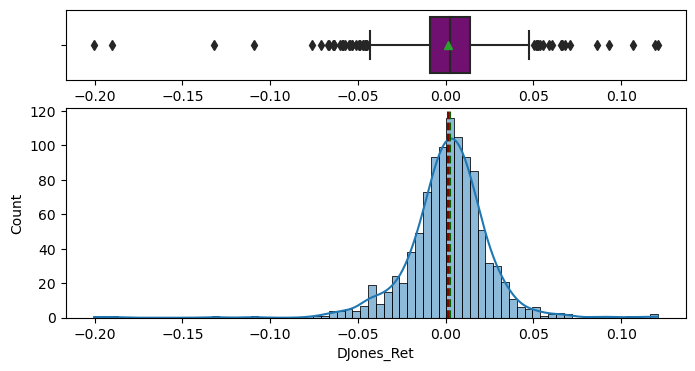

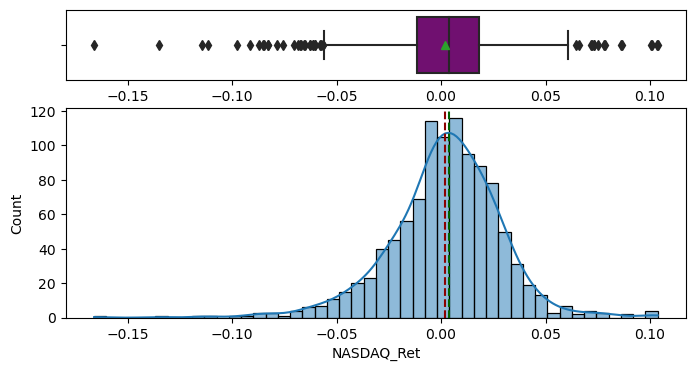

In [23]:
for col in ret_col:
    univ_plot(df_ret,df_ret[col])

* Except NASDAQ, others' weekly returns' histogram shapes are similar.
* Except NASDAQ, most of the weekly returns for the others' are in the range of -5 to 5.

## 3.3 Multivariate

<Axes: >

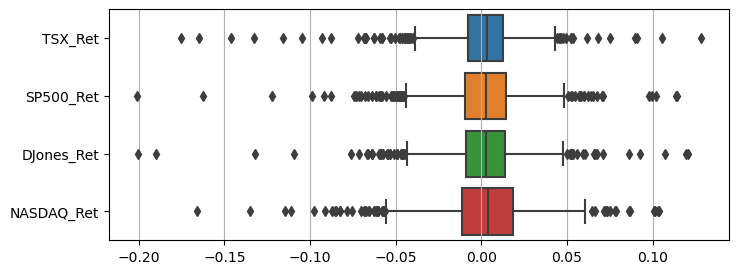

In [24]:
plt.figure(figsize=(8,3))
plt.grid()
sns.boxplot(df_ret[ret_col],orient='h')

<Axes: >

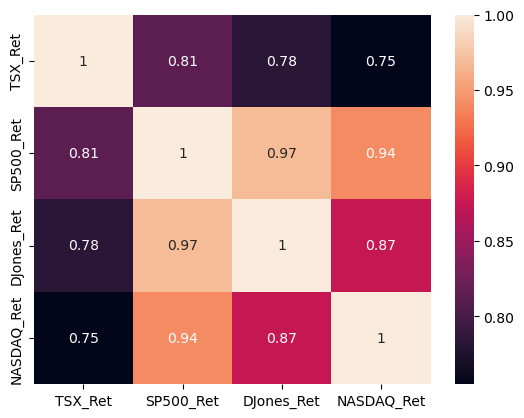

In [25]:
# Correlation
sns.heatmap(df_ret[ret_col].corr(),annot=True)

* As we expect, they are highly correlated.

# **4. Simple Quantitative Analysis**

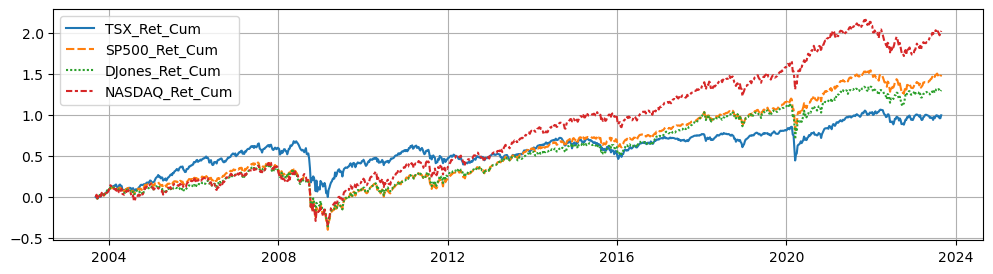

In [26]:
plt.figure(figsize=(12,3))
plt.grid()
d = df_ret[cum_col]
sns.lineplot(d)
plt.show()

* At first glance, we should invest in Nasdaq, but the question is, can you hold it for 20 years? It's always easy to do hindsight.
* Another question is, will Nasdaq still lead in the next 20 years?
* In fact, you never know what will happen tomorrow. Before 2012, the TSX was No. 1, but it has since slipped. It has been the bottom performer since 2016. The same applies when we look at nasdaq now.
* What happened in 2012???

## 4.1 The Famouse Sharpe Ratio - Are you a gambler?

In [27]:
# The famous Sharpe Ratio
risk_free_return = 0.03/52   # Weekly

sharpe = (df_ret[ret_col].describe().T['mean'] - risk_free_return) / df_ret[ret_col].describe().T['std']
sharpe

TSX_Ret       0.016502
SP500_Ret     0.034804
DJones_Ret    0.028025
NASDAQ_Ret    0.049654
dtype: float64

* NASDAQ has the best Sharpe Ratio.

In [28]:
# Put resutls into a DataFrame
df_result = pd.DataFrame(sharpe)
df_result.columns = ['Sharpe_Ratio']
df_result

,Sharpe_Ratio
TSX_Ret,0.016502
SP500_Ret,0.034804
DJones_Ret,0.028025
NASDAQ_Ret,0.049654


# 4.2 Total Return - May give you the illusion that the trend will continue

In [29]:
# Put resutls into a DataFrame
ret_20y = df_ret[cum_col].tail(1).copy()

df_result['Total_Return'] = np.array(ret_20y).T
df_result

,Sharpe_Ratio,Total_Return
TSX_Ret,0.016502,0.992843
SP500_Ret,0.034804,1.486411
DJones_Ret,0.028025,1.299057
NASDAQ_Ret,0.049654,2.021697


## 4.3 Maximum Drawdown (MDD) - Test your endurance and investment skills

In [30]:
for ticker in tickers.keys():
    DD = []
    for i in range(len(df_his[ticker])):
        if i == 0:
            DD.append(0)
        else:
            DD.append(min((df_his[ticker][i] - max(df_his[ticker][0:i])) / max(df_his[ticker][0:i]),0))
    df_ret[ticker+'_DD'] = DD
    
df_ret.head(5)

,TSX_Ret,SP500_Ret,DJones_Ret,NASDAQ_Ret,TSX_Ret_Cum,SP500_Ret_Cum,DJones_Ret_Cum,NASDAQ_Ret_Cum,TSX_DD,SP500_DD,DJones_DD,NASDAQ_DD
2003-09-08,-0.004265,-0.002706,-0.003351,-0.001729,-0.004265,-0.002706,-0.003351,-0.001729,0.000000,0.000000,0.000000,0.000000
2003-09-15,0.002911,0.017198,0.018128,0.026948,-0.001354,0.014492,0.014778,0.025220,0.000000,0.000000,0.000000,0.000000
2003-09-22,-0.022495,-0.038812,-0.035001,-0.061478,-0.023849,-0.024319,-0.020223,-0.036258,-0.022244,-0.038068,-0.034396,-0.059626
2003-09-29,0.011570,0.032568,0.027455,0.048204,-0.012279,0.008249,0.007231,0.011945,-0.010865,-0.006224,-0.007518,-0.013187
2003-10-06,0.015047,0.007941,0.010638,0.018305,0.002768,0.016189,0.017869,0.030250,0.000000,0.000000,0.000000,0.000000


In [31]:
# We need DD cols
dd_col = [col for col in df_ret.columns if 'DD' in col]

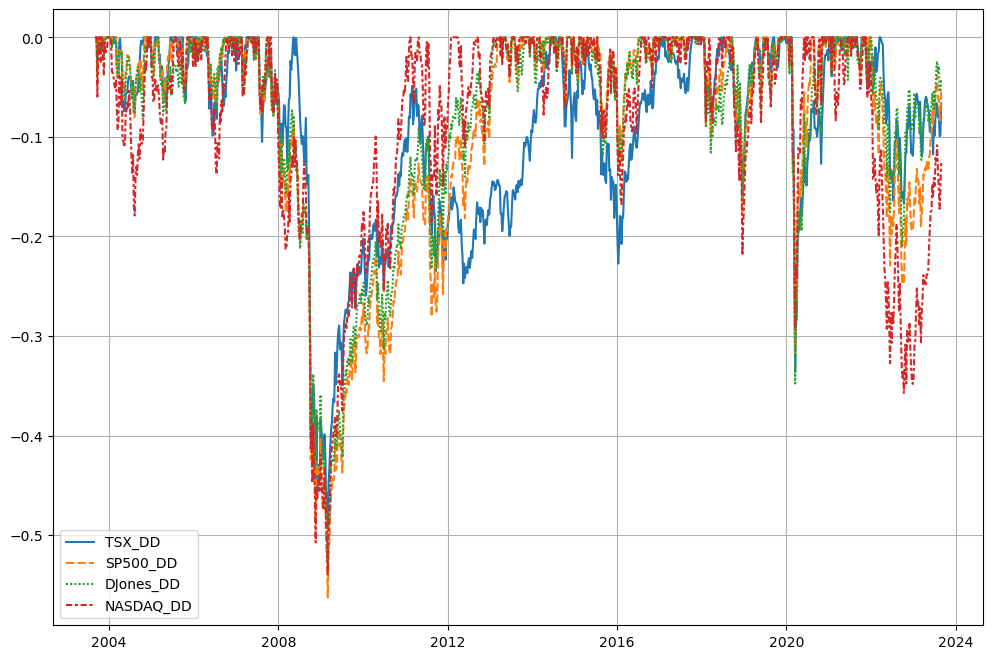

In [32]:
# Let's plot the Drawdown one by one
plt.figure(figsize=(12,8))
plt.grid()
d = df_ret[dd_col]
sns.lineplot(d)
plt.show()


In [33]:
# MDD
MDD = []
for ticker in tickers.keys():
    MDD.append((min(df_ret[ticker+'_DD'])))

df_result['MDD'] = MDD
df_result.head()

,Sharpe_Ratio,Total_Return,MDD
TSX_Ret,0.016502,0.992843,-0.493366
SP500_Ret,0.034804,1.486411,-0.562441
DJones_Ret,0.028025,1.299057,-0.529773
NASDAQ_Ret,0.049654,2.021697,-0.539617


In [34]:
df_result['MDD'].describe()['mean']

-0.5312995071317994

* They have similar MDDs.

## 4.4 Beta in Comparison to the first ticker you set at the beginning - To what extent did your investments beat the benchmark?

In [35]:
# Benchmarck's Variance
ticker1 = list(tickers.keys())[0]
bmvar =  df_his[ticker1+'_Ret'].var()

In [36]:
# Beta
df_result['beta'] = (df_his[ret_col].cov() / bmvar)[ticker1+'_Ret']

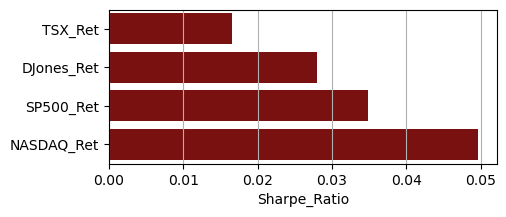

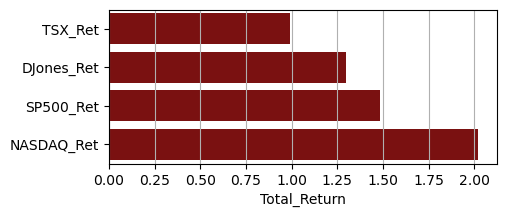

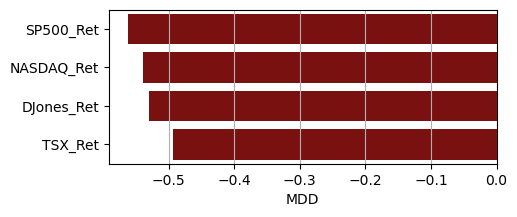

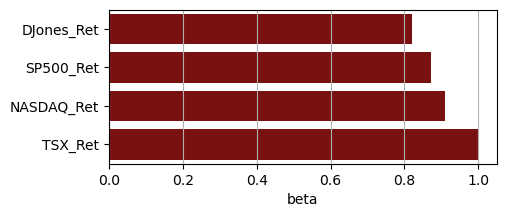

In [37]:
# Why don't we plot the results
for col in df_result.columns:
    plt.figure(figsize=(5,2))
    plt.grid()
    sns.barplot(data=df_result.sort_values(col),x=col, y=df_result.sort_values(col).index, color='darkred')

